In [1]:
import sys, os

# make sure the 'code' dir is on your path (change this):
codepath = '/user_data/mmhender/image_stats_gabor/code/'
sys.path.insert(0,codepath)

import numpy as np

from model_fitting import initialize_fitting 
from analyze_fits import analyze_gabor_params
from utils import default_paths

from analyze_features import load_feature_stats

import matplotlib.pyplot as plt
from matplotlib import cm

from plotting import load_fits, plot_utils

In [51]:
# Load everything

models = initialize_fitting.get_prf_models(which_grid=5)
n_prfs = len(models)
feature_type='gabor_solo'
which_prf_grid=5
# subjects=[1]
subjects = np.arange(1,9)
# trial_subset_list=['balance_indoor_outdoor','outdoor_only', 'indoor_only']
trial_subset_list=['all', \
                   'balance_indoor_outdoor','outdoor_only', 'indoor_only',\
                   'balance_animacy', 'animate_only', 'inanimate_only', \
                   'balance_real_world_size_binary', 'large_only', 'small_only']
path_to_load = os.path.join(default_paths.gabor_texture_feat_path, 'feature_stats')

n_trial_subsets = len(trial_subset_list)
# n_partitions = 3;
# partition_names = ['trn','val','out']

n_features = 96;
n_subjects=len(subjects)
# meanvals = np.zeros((n_subjects, n_trial_subsets, n_features, n_prfs, n_partitions))
# varvals = np.zeros((n_subjects, n_trial_subsets, n_features, n_prfs, n_partitions))
meanvals = np.zeros((n_subjects, n_trial_subsets, n_features, n_prfs))
varvals = np.zeros((n_subjects, n_trial_subsets, n_features, n_prfs))

for si, ss in enumerate(subjects):
    for ti, trial_subset in enumerate(trial_subset_list):
        
        if ti==0:
            fn2load1 = os.path.join(path_to_load, 'S%s_%s_mean_grid%d.npy'\
                                     %(ss, feature_type, which_prf_grid))
            fn2load2 = os.path.join(path_to_load, 'S%s_%s_var_grid%d.npy'\
                                     %(ss, feature_type, which_prf_grid))
            mean = np.load(fn2load1)
            meanvals[si,ti,:,:] = mean
            var = np.load(fn2load2)
            varvals[si,ti,:,:] = var
        else:  
            fn2load1 = os.path.join(path_to_load, 'S%s_%s_mean_grid%d_%s.npy'\
                                         %(ss, feature_type, which_prf_grid, trial_subset))
            fn2load2 = os.path.join(path_to_load, 'S%s_%s_var_grid%d_%s.npy'\
                                         %(ss, feature_type, which_prf_grid, trial_subset))
            mean = np.load(fn2load1)
            meanvals[si,ti,:,:] = mean[:,:,0]
            var = np.load(fn2load2)
            varvals[si,ti,:,:] = var[:,:,0]

In [52]:
colors_outdoor = np.flipud(cm.Greens(np.linspace(0,1,3))[1:3,:])
colors_outdoor = np.concatenate([np.array([[0.6, 0.6, 0.6, 1]]), colors_outdoor], axis=0)

colors_animacy = np.flipud(cm.Reds(np.linspace(0,1,5))[[1,3],:])
colors_animacy = np.concatenate([np.array([[0.6, 0.6, 0.6, 1]]), colors_animacy], axis=0)

colors_size = np.flipud(cm.Blues(np.linspace(0,1,3))[1:3,:])
colors_size = np.concatenate([np.array([[0.6, 0.6, 0.6, 1]]), colors_size], axis=0)

colors_categ = [colors_outdoor, colors_animacy, colors_size]

In [36]:
colors_categ[0].shape

(3, 4)

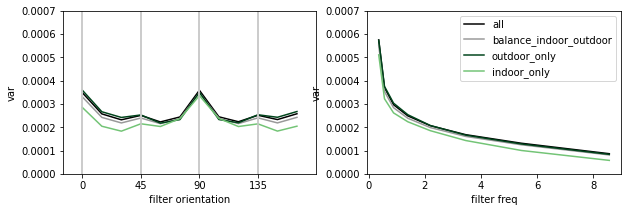

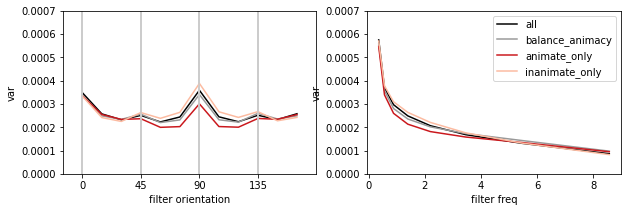

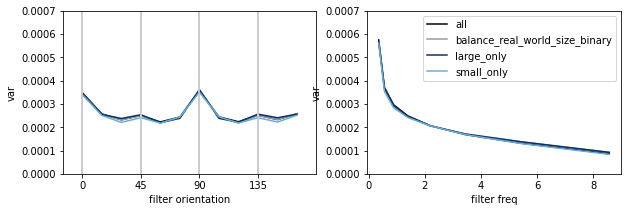

In [59]:
lims = [0, 0.0007]

groups = [[0,1,2,3],[0,4,5,6],[0,7,8,9]]

for gi, group in enumerate(groups):

    
    colors_use = colors_categ[gi]
    colors_use = np.concatenate([np.array([[0, 0, 0, 1]]), colors_use], axis=0)
    
    names = [trial_subset_list[gg] for gg in group]

    plt.figure(figsize=(10,3));

    for color_ind, ti in enumerate(group):

        # mean = np.mean(meanvals[:,ti,:,:], axis=0)
        # mean_reshaped = np.reshape(mean, [n_ori, n_sf, n_prfs], order = 'F')
        # # mean_over_prfs = np.mean(mean_reshaped, axis=2)
        # mean_over_prfs = np.min(mean_reshaped, axis=2)
        
        var = np.mean(varvals[:,ti,:,:], axis=0)
        var_reshaped = np.reshape(var, [n_ori, n_sf, n_prfs], order = 'F')
        var_plot = np.min(var_reshaped, axis=2)
        
        plt.subplot(1,2,1)
        plt.plot(ori_unique, np.mean(var_plot, axis=1), color=colors_use[color_ind,:])
        plt.xlabel('filter orientation');
        plt.ylabel('var');
        # plt.yticks([])
        plt.xlim([-15, 180])
        for ii in np.arange(0,180,45):
            plt.axvline(ii, color=[0.8, 0.8, 0.8])
        plt.ylim(lims)
        plt.xticks(np.arange(0,180,45))

        plt.subplot(1,2,2)
        plt.plot(sf_unique, np.mean(var_plot, axis=0), color=colors_use[color_ind,:])
        plt.xlabel('filter freq');
        plt.ylabel('var');
        # plt.yticks([])
        plt.ylim(lims)

    plt.subplot(1,2,2)
    plt.legend(names)
            
        # plt.suptitle(partition_names[pi])
    

In [4]:
ti

0

In [3]:
mean.shape

(96, 1456)

In [3]:
feature_type='gabor_solo'
subject=999
mean_all, var_all, covar_all = \
        load_feature_stats.load_feature_stats(feature_type, subject=subject)


In [4]:
mean_all.shape

(96, 1456)

In [5]:
meanvals.shape

(8, 9, 96, 1456, 3)

In [6]:
# Gather information about the gabor feature channels
sf_unique, ori_unique = analyze_gabor_params.get_gabor_feature_info(n_ori=12, n_sf=8)
n_sf = len(sf_unique)
n_ori = len(ori_unique)

 

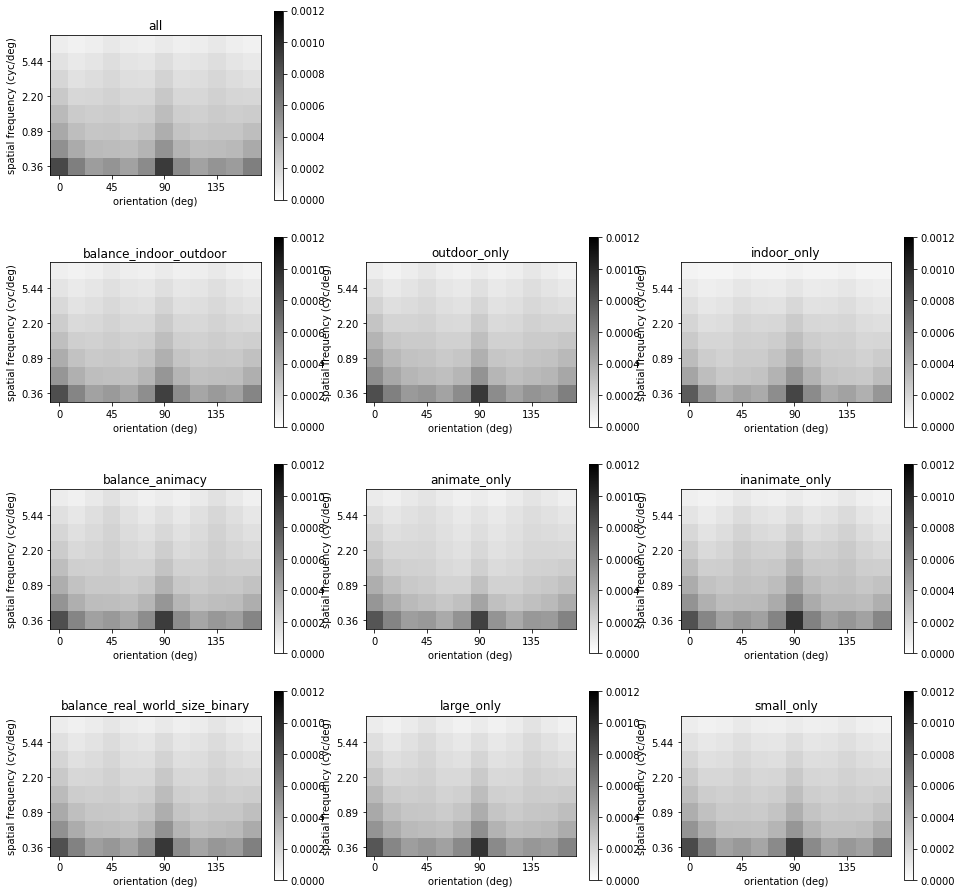

In [70]:
varlims = [0, 0.0012]
clims = varlims

gg2plot = np.arange(10)

plt.figure(figsize=(16,16));

pi = 0;

for gg in gg2plot:

    var = np.mean(varvals[:,gg,:,:], axis=0)
    name = trial_subset_list[gg]
        
    var_reshaped = np.reshape(var, [n_ori, n_sf, n_prfs], order = 'F')
    # image = np.mean(var_reshaped, axis=2)
    image = np.min(var_reshaped, axis=2)

    pi+=1
    plt.subplot(4,3,pi)
    plt.pcolormesh(image.T, vmin=clims[0], vmax=clims[1], cmap=cm.gray_r)
    plt.colorbar()
    plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
    sf_ticks = sf_unique[[0,2,4,6]].round(2)

    plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
    plt.ylabel('spatial frequency (cyc/deg)')

    plt.axis('square')
    plt.xlim([0,12])
    plt.ylim([0,8])
    plt.xlabel('orientation (deg)')
    plt.title(name)
    
    if gg==0:
        pi+=2;


In [63]:
np.max(image)

0.0012633138590539962

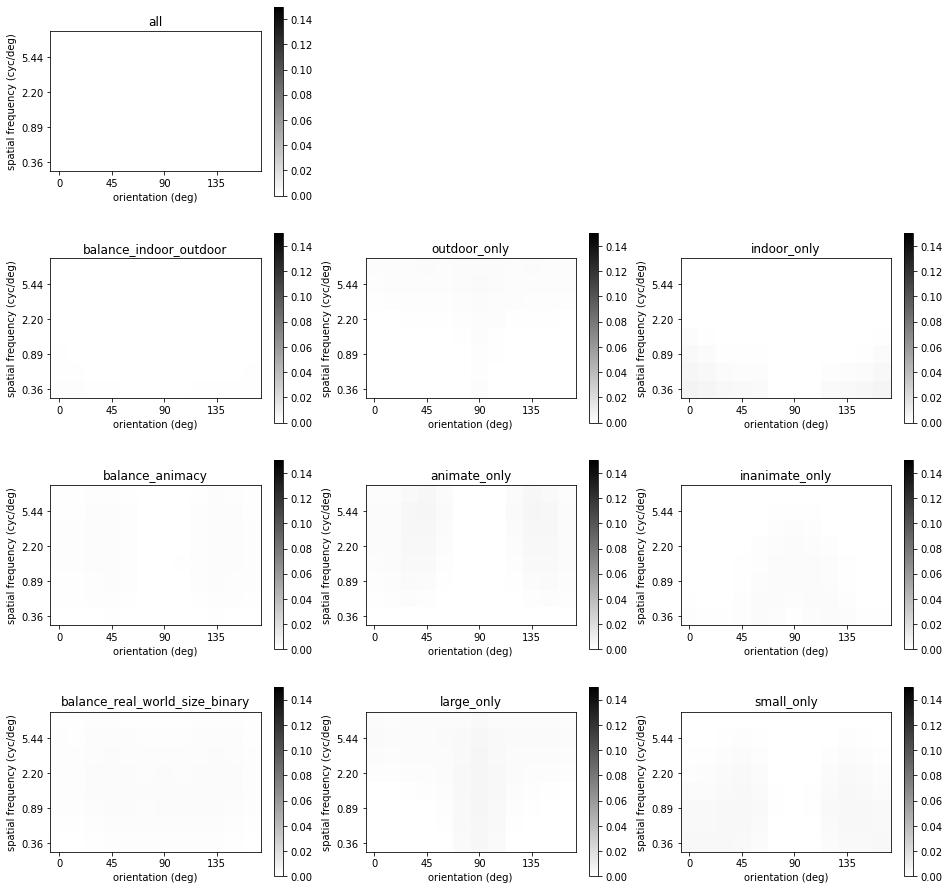

In [25]:
varlims = [0, 0.15]
clims = varlims

var = np.mean(varvals[:,0,:,:], axis=0)
var_reshaped = np.reshape(var, [n_ori, n_sf, n_prfs], order = 'F')
image_alltrials = np.mean(var_reshaped, axis=2)


gg2plot = np.arange(10)

plt.figure(figsize=(16,16));

pi = 0;

for gg in gg2plot:

    var = np.mean(varvals[:,gg,:,:], axis=0)
    name = trial_subset_list[gg]
        
    var_reshaped = np.reshape(var, [n_ori, n_sf, n_prfs], order = 'F')
    image = np.mean(var_reshaped, axis=2)

    image = (image - image_alltrials)
    
    pi+=1
    plt.subplot(4,3,pi)
    plt.pcolormesh(image.T, \
                   vmin=clims[0], vmax=clims[1], \
                   cmap=cm.gray_r)
    plt.colorbar()
    plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
    sf_ticks = sf_unique[[0,2,4,6]].round(2)

    plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
    plt.ylabel('spatial frequency (cyc/deg)')

    plt.axis('square')
    plt.xlim([0,12])
    plt.ylim([0,8])
    plt.xlabel('orientation (deg)')
    plt.title(name)
    
    if gg==0:
        pi+=2;


In [17]:
np.min(image), np.max(image)

(-0.0019128546982256633, 0.004569844104180751)

In [26]:
# varvals

In [10]:
gg2plot

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

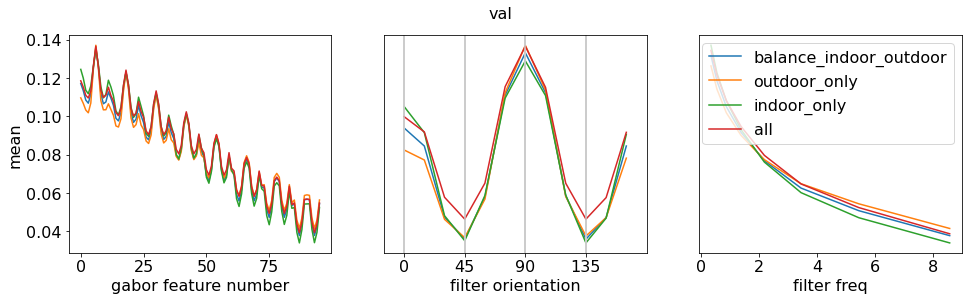

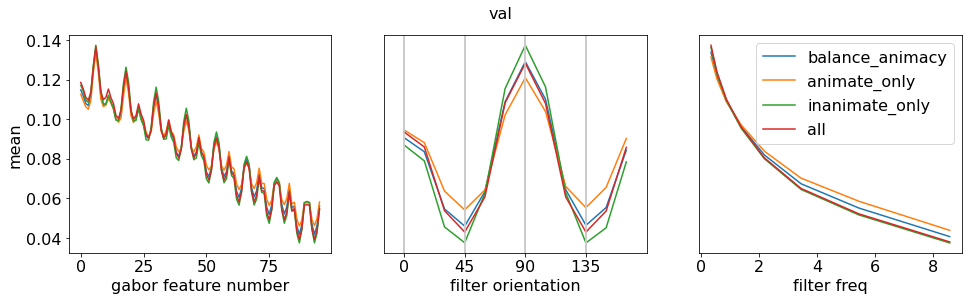

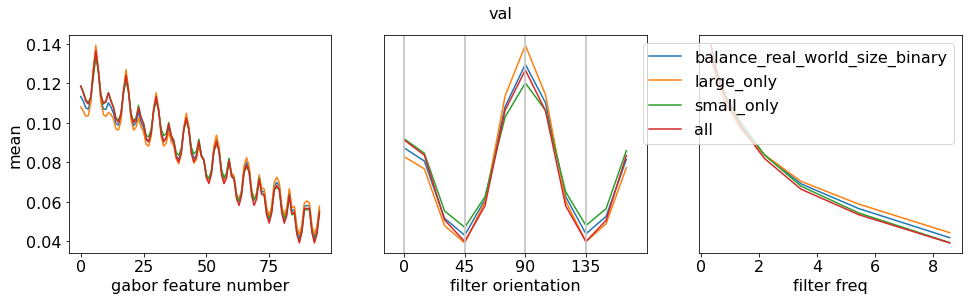

In [66]:
lims = [0, 0.14]

groups = [[0,1,2,9],[3,4,5,9],[6,7,8,9]]

for pi in [1]:
# for pi in [0,1,2]:

    for group in groups:

        names = [trial_subset_list[gg] for gg in group[0:3]]
        names += ['all']
        
        plt.figure(figsize=(16,4));

        for ti in group:

            if ti==9:
                mean = mean_all
            else:
                mean = np.mean(meanvals[:,ti,:,:,pi], axis=0)
            mean_reshaped = np.reshape(mean, [n_ori, n_sf, n_prfs], order = 'F')

            plt.subplot(1,3,1)
            plt.plot(np.mean(mean, axis=1)[0:150])
            plt.xlabel('gabor feature number');
            plt.ylabel('mean');
            # plt.ylim(lims)

            plt.subplot(1,3,2)
            plt.plot(ori_unique, np.mean(np.mean(mean_reshaped, axis=2), axis=1))
            plt.xlabel('filter orientation');
            # plt.ylabel('var');
            plt.yticks([])
            plt.xlim([-15, 180])
            for ii in np.arange(0,180,45):
                plt.axvline(ii, color=[0.8, 0.8, 0.8])
            # plt.ylim(lims)
            plt.xticks(np.arange(0,180,45))

            plt.subplot(1,3,3)
            plt.plot(sf_unique, np.mean(np.mean(mean_reshaped, axis=2), axis=0))
            plt.xlabel('filter freq');
            # plt.ylabel('var');
            plt.yticks([])
            # plt.ylim(lims)

        plt.subplot(1,3,3)
        plt.legend(names)
            
        plt.suptitle(partition_names[pi])
    

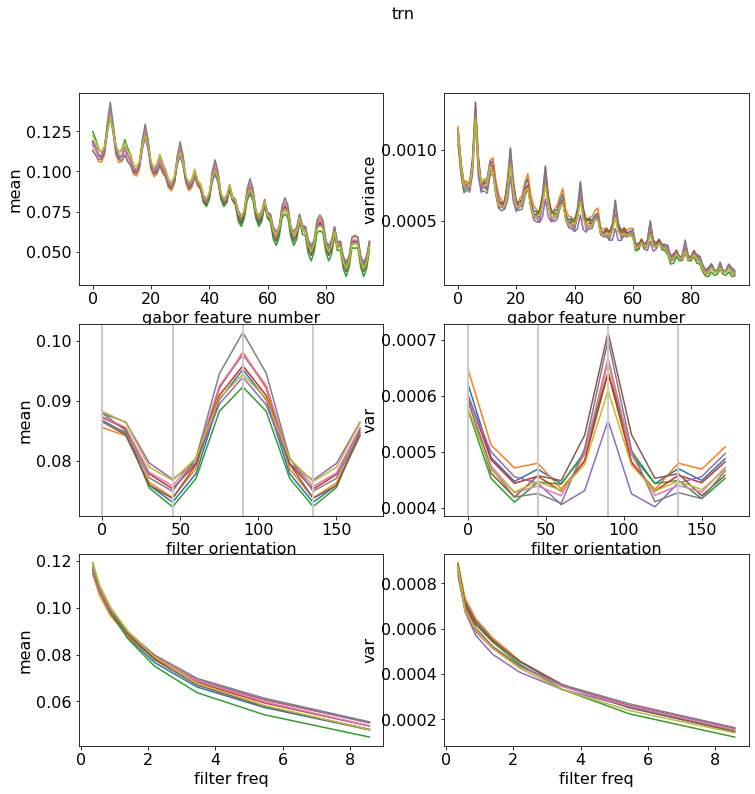

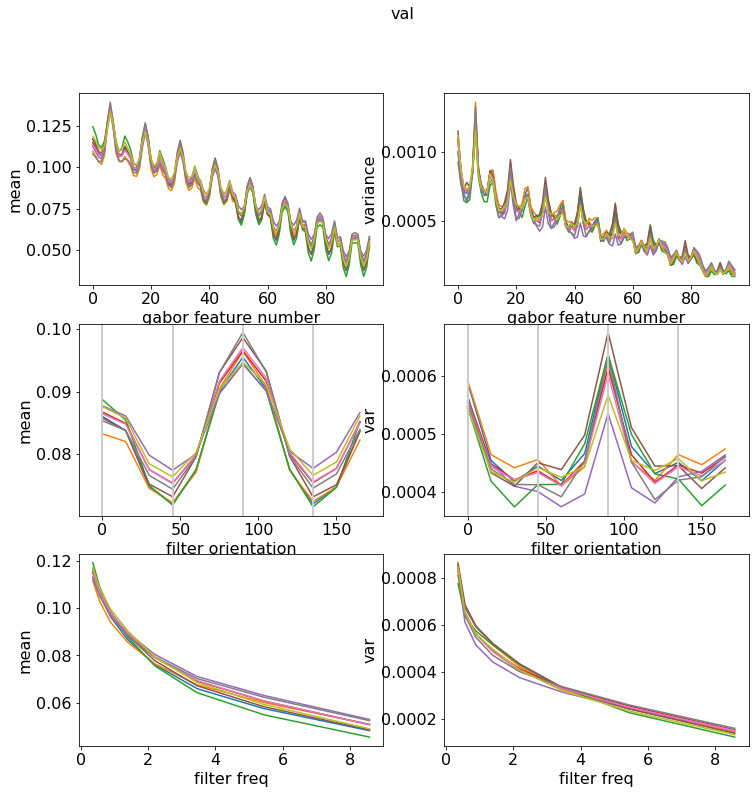

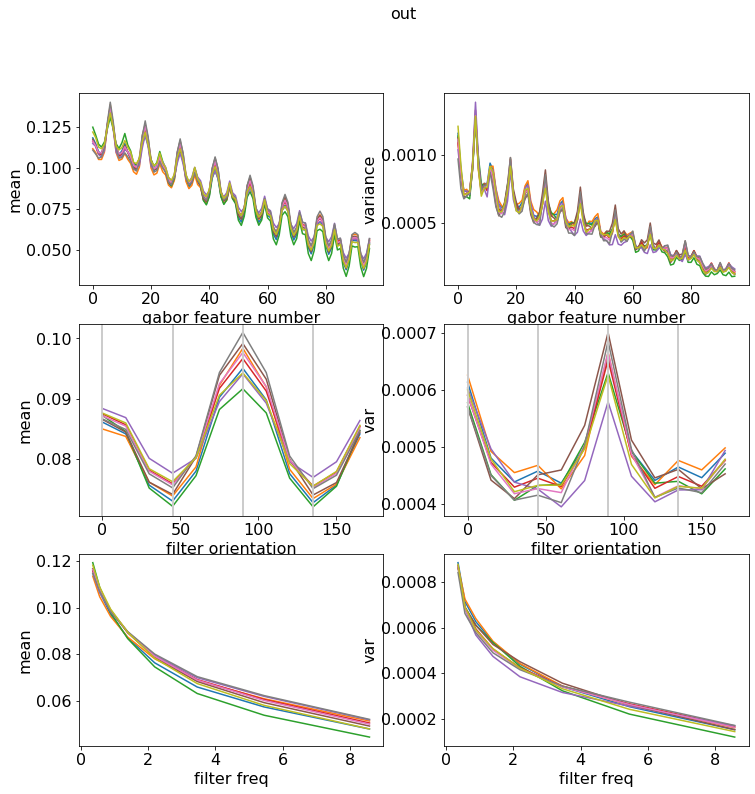

In [48]:

for pi in [0,1,2]:

    plt.figure(figsize=(12,12));

    for ti in range(n_trial_subsets):

        mean = np.mean(meanvals[:,ti,:,:,pi], axis=0)
        var = np.mean(varvals[:,ti,:,:,pi], axis=0)
        mean_reshaped = np.reshape(mean, [n_ori, n_sf, n_prfs], order = 'F')
        var_reshaped = np.reshape(var, [n_ori, n_sf, n_prfs], order = 'F')

        plt.subplot(3,2,1)
        plt.plot(np.mean(mean, axis=1)[0:150])
        plt.xlabel('gabor feature number');
        plt.ylabel('mean');
        plt.subplot(3,2,2)
        plt.plot(np.mean(var, axis=1)[0:150])
        plt.xlabel('gabor feature number');
        plt.ylabel('variance');

        plt.subplot(3,2,3)
        plt.plot(ori_unique, np.mean(np.mean(mean_reshaped, axis=2), axis=1))
        plt.xlabel('filter orientation');
        plt.ylabel('mean');
        plt.xlim([-15, 180])
        for ii in np.arange(0,180,45):
            plt.axvline(ii, color=[0.8, 0.8, 0.8])

        plt.subplot(3,2,4)
        plt.plot(ori_unique, np.mean(np.mean(var_reshaped, axis=2), axis=1))
        plt.xlabel('filter orientation');
        plt.ylabel('var');
        plt.xlim([-15, 180])
        for ii in np.arange(0,180,45):
            plt.axvline(ii, color=[0.8, 0.8, 0.8])

        plt.subplot(3,2,5)
        plt.plot(sf_unique, np.mean(np.mean(mean_reshaped, axis=2), axis=0))
        plt.xlabel('filter freq');
        plt.ylabel('mean');

        plt.subplot(3,2,6)
        plt.plot(sf_unique, np.mean(np.mean(var_reshaped, axis=2), axis=0))
        plt.xlabel('filter freq');
        plt.ylabel('var');
        
    plt.suptitle(partition_names[pi])
    

In [41]:
mean.shape

(96, 1456, 3)

#### Plot mean/variance each feature channel
Averaged across pRFs